## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [8]:
x=np.linspace(0,20, 50)

In [9]:
y=-1*x+2

#### Plot your data points. 

<function matplotlib.pyplot.show(close=None, block=None)>

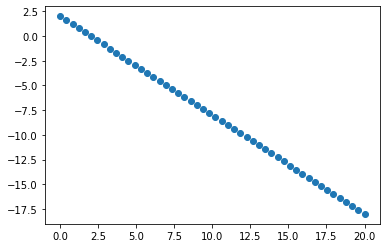

In [4]:
plt.scatter(x,y)
plt.show

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [18]:
def batch_gd(x,y,alpha,max_iterations):
    h_lst=[]
    theta0=0
    theta1=0
    theta0lst=[]
    theta1lst=[]
    no_of_iterations=[]
    cost=[]
    iteration=0
     m=len(x)
    for i in range(max_iterations):
        h= theta0 + theta1 * x
        j=(1/(2*m)*(sum((h-y)**2)))
        
        grad0=(1/m)*sum((h-y))
        grad1=(1/m)*sum(x*(h-y))
        
        theta0=theta0-(alpha*grad0)
        theta1=theta1-(alpha*grad1)
        
        theta0lst.append(theta0)
        theta1lst.append(theta1)
        iteration=iteration+1
        cost.append(j)
        h_lst.append(h)
        no_of_iterations.append(iteration)
        
        try :
            cond=abs(np.linalg.norm([w0,w1])-np.linalg.norm([theta0lst[-2],theta1lst[-2]]))
            if cond < 0.0001:
                break
        except (IndexError) :
            pass
    return ( cost ,h ,theta0lst,theta1lst ,theta0,theta1, no_of_iterations ,h_lst)

In [19]:
cost ,h ,theta0lst,theta1lst ,theta0,theta1, no_of_iterations ,h_lst=batch_gd(x,y,0.001,1000)
from sklearn.metrics import r2_score

h= theta0 + theta1 * x
r2 = r2_score(y, h)
print(r2)

0.9799535189079632


# Update your Batch GD for one variable implementation to be MOMENTUM

In [23]:
def batch_gd_MOMENTUM(x,y,alpha,gama,max_iterations):
    w0=0
    w1=0
    history0=0
    history1=0
    h_lst=[]
    theta0lst=[]
    theta1lst=[]
    no_of_iterations=[]
    cost=[]
    iteration=0
    m=len(x)
    for i in range(max_iterations):
        h= w0 + w1 * x
       
        j=(1/(2*m)*(sum((h-y)**2)))
        grad0=(1/m)*sum((h-y))
        grad1=(1/m)*sum(x*(h-y))
    
        v0=gama*history0 + alpha * grad0
        v1=gama*history1 + alpha * grad1
      
        w0=w0-v0
        w1=w1-v1
    
        history0=v0
        history1=v1
        
        theta0lst.append(w0)
        theta1lst.append(w1)
        iteration=iteration+1
        cost.append(j)
        h_lst.append(h)
        no_of_iterations.append(iteration)
       
        try :
            cond=abs(np.linalg.norm([w0,w1])-np.linalg.norm([theta0lst[-2],theta1lst[-2]]))
            if cond < 0.0001:
                break
        except (IndexError) :
            pass
    return ( cost ,h ,theta0lst,theta1lst ,w0,w1, no_of_iterations ,h_lst)

In [24]:
cost ,h ,theta0lst,theta1lst ,w0,w1, no_of_iterations ,h_lst=batch_gd_MOMENTUM(x,y,0.001,0.9,1000)

In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(y, h)
print(r2)

0.9796873000975207


<function matplotlib.pyplot.show(close=None, block=None)>

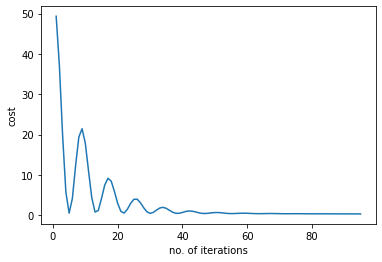

In [26]:
plt.plot(no_of_iterations,cost)
plt.xlabel('no. of iterations')
plt.ylabel('cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

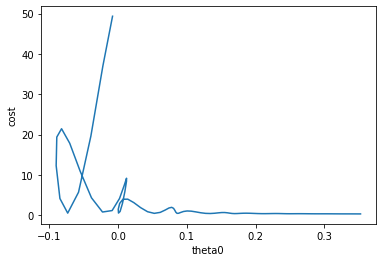

In [27]:
plt.plot(theta0lst,cost)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

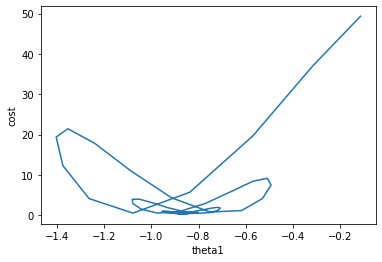

In [28]:
plt.plot(theta1lst,cost)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

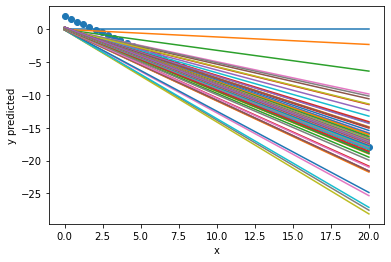

In [29]:
plt.scatter(x,y)
for h in h_lst:
    plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

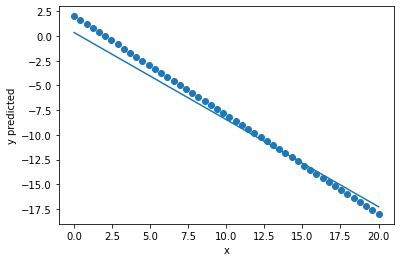

In [30]:
plt.scatter(x,y)
plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.show

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

<function matplotlib.pyplot.show(close=None, block=None)>

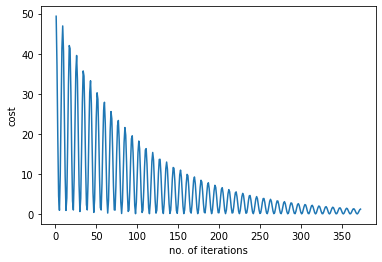

In [180]:
#very large momentum value
cost ,h ,theta0lst,theta1lst ,w0,w1, no_of_iterations ,h_lst=batch_gd_MOMENTUM(x,y,0.001,0.99,1000)
plt.plot(no_of_iterations,cost)
plt.xlabel('no. of iterations')
plt.ylabel('cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

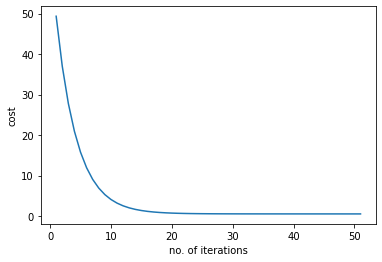

In [32]:
#zero momentum value
cost ,h ,theta0lst,theta1lst ,w0,w1, no_of_iterations ,h_lst=batch_gd_MOMENTUM(x,y,0.001,0,1000)
plt.plot(no_of_iterations,cost)
plt.xlabel('no. of iterations')
plt.ylabel('cost')
plt.show

### Update your Batch GD for one variable  implementation to be NAG and check your results

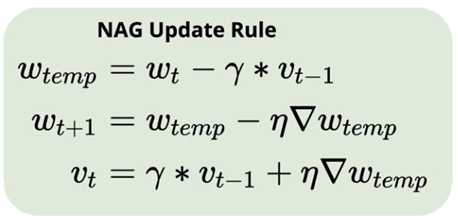

In [10]:
def batch_gd_NAG(x,y,alpha,max_iterations):
    w0=0
    w1=0
    gama=0.9
    v_history0=0
    v_history1=0
    h_lst=[]
    theta0lst=[]
    theta1lst=[]
    no_of_iterations=[]
    cost=[]
    iteration=0
    m=len(x)
    for i in range(max_iterations):
        h=w0+w1*x 
        
        j=(1/(2*m)*(sum((h-y)**2)))
    
    
        w_temp0=w0-gama*v_history0
        w_temp1=w1-gama*v_history1
    
        h= w_temp0 + w_temp1 * x
        grad0=(1/m)*sum((h-y))
        grad1=(1/m)*sum(x*(h-y))
        
        w0=w_temp0-alpha*grad0
        w1=w_temp1-alpha*grad1
    
        v0=gama*v_history0+alpha*grad0
        v1=gama*v_history1+alpha*grad1
    
        v_history0=v0
        v_history1=v1
        
        theta0lst.append(w0)
        theta1lst.append(w1)
        iteration=iteration+1
        cost.append(j)
        h_lst.append(h)
        no_of_iterations.append(iteration)
        
        try :
            cond=abs(np.linalg.norm([w0,w1])-np.linalg.norm([theta0lst[-2],theta1lst[-2]]))
            if cond < 0.0001:
                break
        except (IndexError) :
            pass
        
    return ( cost ,h ,theta0lst,theta1lst ,w0,w1, no_of_iterations ,h_lst)
    
       

In [11]:
cost ,h ,theta0lst,theta1lst ,theta0,theta1, no_of_iterations ,h_lst=batch_gd_NAG(x,y,0.001,1000)

In [12]:
from sklearn.metrics import r2_score
r2 = r2_score(y, h)
print(r2)

0.9736110798716767


<function matplotlib.pyplot.show(close=None, block=None)>

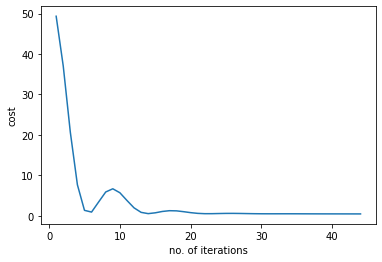

In [13]:
plt.plot(no_of_iterations,cost)
plt.xlabel('no. of iterations')
plt.ylabel('cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

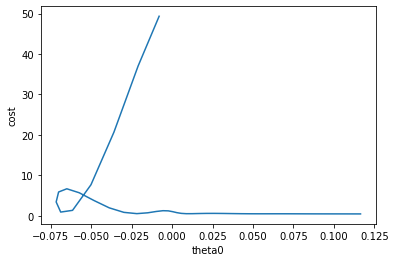

In [14]:
plt.plot(theta0lst,cost)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

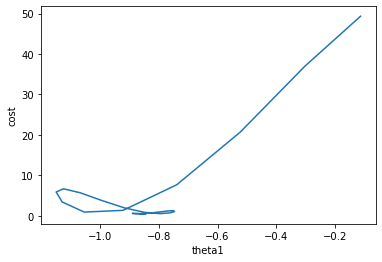

In [15]:
plt.plot(theta1lst,cost)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

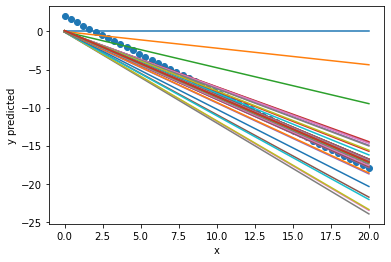

In [16]:
plt.scatter(x,y)
for h in h_lst:
    plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

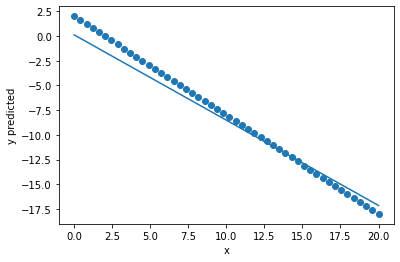

In [17]:
plt.scatter(x,y)
plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.show

## Congratulations 
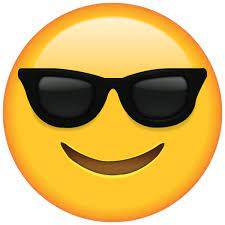